#### Load data

In [1]:
from mamba_mic.data_modules.decathlon import DecathlonDataModule
from pathlib import Path

/home/eriksalv/workspace/mamba-mic/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_module = DecathlonDataModule(batch_size=4, data_dir="../data")

Loading Decathlon dataset for task Task01_BrainTumour from ../data


In [3]:
if not Path("../data/Task01_BrainTumour").exists():
    data_module.prepare_data()

In [4]:
data_module.setup()
print(len(data_module.train_set))
print(len(data_module.val_set))

388
96


#### Inspecting the data

In [5]:
import matplotlib.pyplot as plt

In [6]:
sample_idx = 0
slice = 70

sample = data_module.train_set[sample_idx]
img = sample["image"]
label = sample["label"]

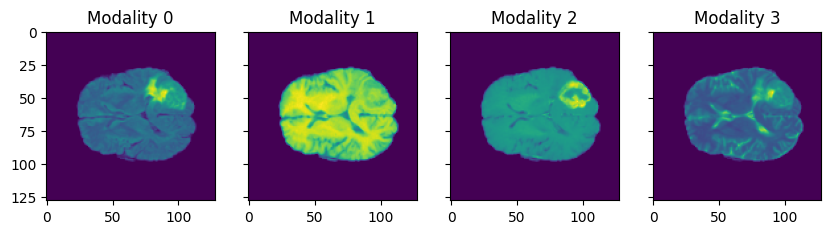

In [7]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10, 5))

for i in range(4):
    axs[i].set_title(f"Modality {i}")
    axs[i].imshow(img[i, :, :, slice])

plt.show()

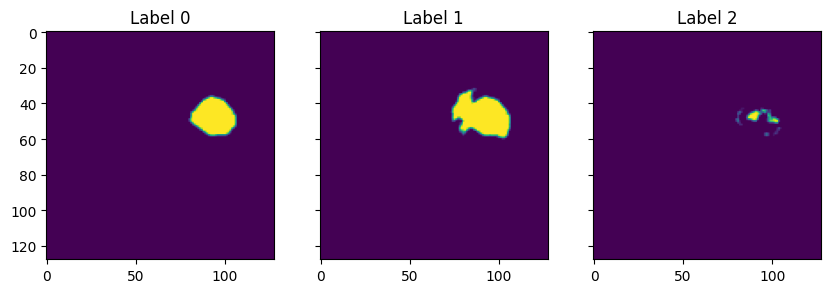

In [8]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(10, 5))

for i in range(3):
    axs[i].set_title(f"Label {i}")
    axs[i].imshow(label[i, :, :, slice])

plt.show()

For reference: 
```json
"modality": { 
	 "0": "FLAIR", 
	 "1": "T1w", 
	 "2": "t1gd",
	 "3": "T2w"
 },  
 "labels": { 
	 "0": "background", 
	 "1": "edema",
	 "2": "non-enhancing tumor",
	 "3": "enhancing tumour"
 }, 
```